# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [4]:
df = pd.read_csv(os.path.join('..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


Answer: 400 admission info

> ### Question 2.  Create a summary table.

In [6]:
df.describe()

/Users/Veronica/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

Answer: the range of gre and gpa are significantly different, hence we can't compare variance on absolute terms

> ### Question 4.  Drop data points with missing data.

In [7]:
df = df.dropna()
df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


Answer: the number of non-null values are now the same

> ### Question 6.  Create boxplots for `gre` and `gpa`.

{'boxes': [<matplotlib.lines.Line2D at 0x117c12710>],
 'caps': [<matplotlib.lines.Line2D at 0x117c2c590>,
 'fliers': [<matplotlib.lines.Line2D at 0x117c36890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x117c36250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x117c12850>,
  <matplotlib.lines.Line2D at 0x117c12f10>]}

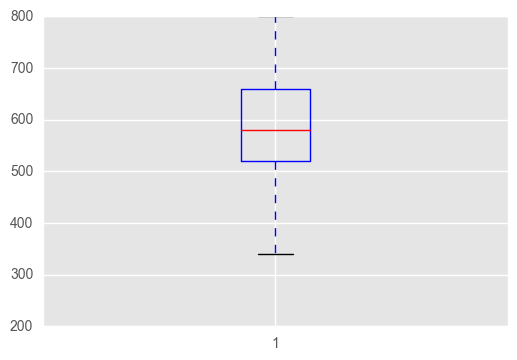

In [9]:
plt.boxplot(df['gre'])

{'boxes': [<matplotlib.lines.Line2D at 0x1180654d0>],
 'caps': [<matplotlib.lines.Line2D at 0x118074350>,
 'fliers': [<matplotlib.lines.Line2D at 0x118080650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x118074fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x118065610>,
  <matplotlib.lines.Line2D at 0x118065cd0>]}

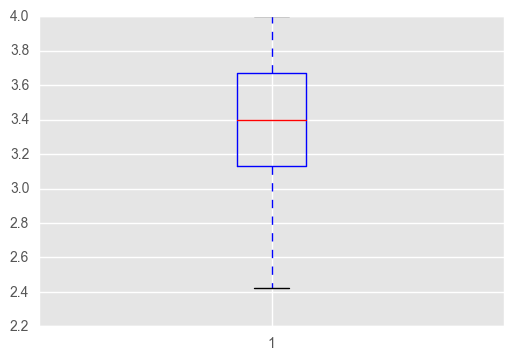

In [10]:
plt.boxplot(df['gpa'])

> ### Question 7.  What do boxplots show?

Answer: more people's gpa and gre are above medium; the interquartile range is smaller for gre than for gpa

> ### Question 8.  Plot the distribution of each variable.

(array([ 271.,  126.]), array([ 0. ,  0.5,  1. ]), <a list of 2 Patch objects>)

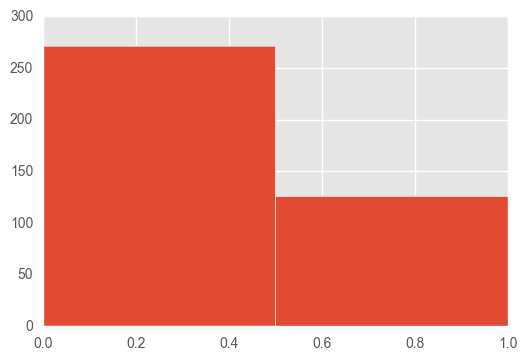

In [16]:
plt.hist(df['admit'],bins=2)

(array([  1.,   3.,  16.,  28.,  50.,  75.,  81.,  64.,  44.,  35.]),
 array([ 220.,  278.,  336.,  394.,  452.,  510.,  568.,  626.,  684.,
         742.,  800.]),
 <a list of 10 Patch objects>)

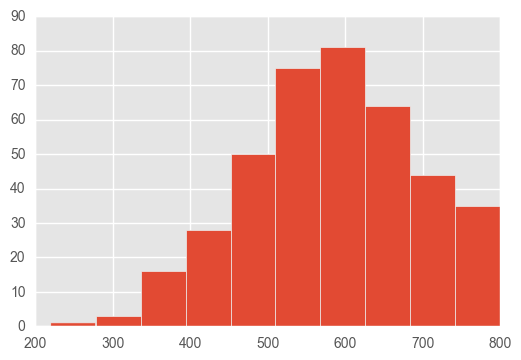

In [12]:
plt.hist(df['gre'])

(array([  3.,   4.,  16.,  32.,  42.,  57.,  76.,  65.,  39.,  63.]),
 array([ 2.26 ,  2.434,  2.608,  2.782,  2.956,  3.13 ,  3.304,  3.478,
         3.652,  3.826,  4.   ]),
 <a list of 10 Patch objects>)

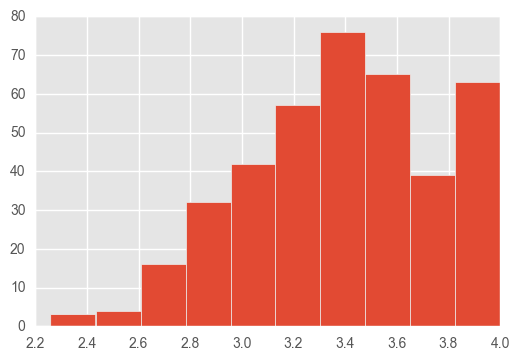

In [13]:
plt.hist(df['gpa'])

(array([  61.,    0.,    0.,  148.,    0.,    0.,  121.,    0.,    0.,   67.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

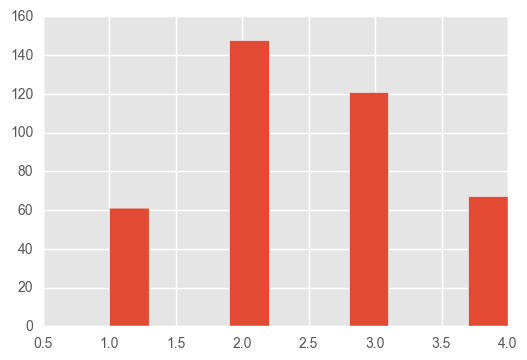

In [14]:
plt.hist(df['prestige'])

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Answer: if the model requires a normal distribution for gre or gps, we wouldn't meet the requirement, and the distribution does need correction, at least investigate the possibility of outliers

> ### Question 10.  Create a correlation matrix for the dataset

In [15]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: all of the variablae could potentially be colinear

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: 
1. Clearly define the 4 categories within "prestige"
2. Sum up the number of admitted students within each group and see if the number increases along with the prestige of school
3. Calculate the ratio of admission within each group and see if the rate increases along with the prestige of school

> ### Question 13.  What is your hypothesis?

Answer: within the surveyed period, the more prestigious the school is, the higher the admission rate